# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from scipy.stats import linregress

from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [3]:
#lat & lng ranges
lat_range=(-90, 90)
lng_range=(-180,180)

#lists to hold location and cities
lat_lngs = []
cities = []

#random city selection
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#nearest city id for random selection
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #add to list if unique name
    if city not in cities:
        cities.append(city)

len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#OpenWeatherMap url + api key & modifications needed for call
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = weather_url + "appid=" + weather_api_key + "&units=" + units + "&q="

#print test city 
test = requests.get(f'{query_url}indianapolis').json()
display(test)

{'coord': {'lon': -86.158, 'lat': 39.7684},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 70.7,
  'feels_like': 70.99,
  'temp_min': 68.22,
  'temp_max': 73.92,
  'pressure': 1017,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 120},
 'clouds': {'all': 40},
 'dt': 1627743251,
 'sys': {'type': 2,
  'id': 2037844,
  'country': 'US',
  'sunrise': 1627728170,
  'sunset': 1627779541},
 'timezone': -14400,
 'id': 4259418,
 'name': 'Indianapolis',
 'cod': 200}

In [5]:
# lists to hold data for df creation 
country = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

city_list = []

#run loop & print data request for all cities from random list
counter = 0

print('Beginning Data Retrieval')
print('------------')

for city in cities:
    
    response=requests.get(query_url + city).json()
    
    try:
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        city_list.append(city)
        
        counter += 1
        
        print(f"Processing Records {counter} | {city}")
        
    except:
        print("City not found. Skipping.")
        pass
    
print('------------')
print('Data Retrieval Complete')
print('------------')

Beginning Data Retrieval
------------
Processing Records 1 | saint-philippe
Processing Records 2 | chimbote
Processing Records 3 | porosozero
Processing Records 4 | manyana
Processing Records 5 | guerrero negro
Processing Records 6 | ushuaia
Processing Records 7 | hermanus
Processing Records 8 | ugoofaaru
Processing Records 9 | hambantota
City not found. Skipping.
Processing Records 10 | busselton
Processing Records 11 | punta arenas
Processing Records 12 | cape town
City not found. Skipping.
Processing Records 13 | puerto ayora
Processing Records 14 | hasaki
Processing Records 15 | upernavik
Processing Records 16 | hobart
Processing Records 17 | ilulissat
City not found. Skipping.
City not found. Skipping.
Processing Records 18 | palu
Processing Records 19 | cherskiy
Processing Records 20 | mataura
Processing Records 21 | vaini
Processing Records 22 | kapaa
Processing Records 23 | porto
Processing Records 24 | mar del plata
Processing Records 25 | yarim
Processing Records 26 | constit

Processing Records 223 | pontes e lacerda
Processing Records 224 | udachnyy
Processing Records 225 | nampa
Processing Records 226 | kralendijk
Processing Records 227 | izberbash
Processing Records 228 | colares
Processing Records 229 | tubuala
Processing Records 230 | havelock
Processing Records 231 | tabou
Processing Records 232 | vangazi
Processing Records 233 | omboue
Processing Records 234 | moate
Processing Records 235 | ancud
Processing Records 236 | reconquista
Processing Records 237 | khorixas
Processing Records 238 | berlevag
Processing Records 239 | huanren
Processing Records 240 | katangli
Processing Records 241 | anqing
Processing Records 242 | sorland
Processing Records 243 | north ogden
Processing Records 244 | monroe
Processing Records 245 | tignere
Processing Records 246 | buraydah
Processing Records 247 | port said
Processing Records 248 | mecca
Processing Records 249 | bredasdorp
Processing Records 250 | ribeira grande
Processing Records 251 | lompoc
Processing Record

Processing Records 445 | rogaska slatina
Processing Records 446 | basarabeasca
Processing Records 447 | manali
Processing Records 448 | pajapan
Processing Records 449 | malaryta
Processing Records 450 | ketchikan
Processing Records 451 | vagur
Processing Records 452 | fare
Processing Records 453 | kasongo-lunda
Processing Records 454 | caravelas
City not found. Skipping.
Processing Records 455 | dosso
Processing Records 456 | sheridan
Processing Records 457 | popondetta
City not found. Skipping.
City not found. Skipping.
Processing Records 458 | medyn
Processing Records 459 | sfantu gheorghe
Processing Records 460 | dingle
Processing Records 461 | fort nelson
Processing Records 462 | anadyr
Processing Records 463 | port lincoln
Processing Records 464 | thompson
Processing Records 465 | jay
Processing Records 466 | tynda
Processing Records 467 | benemerito de las americas
Processing Records 468 | moree
Processing Records 469 | saraland
Processing Records 470 | dauphin
Processing Records

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create df
city_df = pd.DataFrame({'City': city_list,
                       'Country': country,
                       'Lat': lat,
                       'Lng': lng,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Date': date})
display(city_df)

#export df to csv
output_df = "../output_data/cities.csv"
city_df.to_csv(output_df, encoding="utf-8", index=False)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,saint-philippe,RE,-21.3585,55.7679,71.19,75,48,16.64,1627743291
1,chimbote,PE,-9.0853,-78.5783,67.33,77,40,8.93,1627743291
2,porosozero,RU,62.7191,32.7270,65.17,77,23,5.77,1627743292
3,manyana,BW,-23.4000,21.7167,69.67,18,0,13.09,1627743292
4,guerrero negro,MX,27.9769,-114.0611,73.42,72,53,4.70,1627743292
...,...,...,...,...,...,...,...,...,...
563,cradock,ZA,-32.1642,25.6192,70.59,10,35,9.22,1627743458
564,kalamnuri,IN,19.6667,77.3333,79.34,71,100,16.51,1627743459
565,ust-ordynskiy,RU,52.8050,104.7508,62.44,88,92,4.88,1627743459
566,kirakira,SB,-10.4544,161.9205,75.31,82,89,7.54,1627743460


In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.055870,17.108465,71.366426,66.126761,53.433099,8.043627,1.627743e+09
std,33.621364,90.381153,14.534552,22.634621,39.488249,5.478209,6.309811e+01
min,-54.800000,-179.166700,31.370000,7.000000,0.000000,0.000000,1.627743e+09
25%,-9.496500,-63.942375,61.870000,55.000000,9.750000,3.795000,1.627743e+09
50%,22.180350,23.238150,73.355000,71.000000,63.500000,6.910000,1.627743e+09
75%,47.049650,95.523175,81.727500,83.000000,94.000000,11.500000,1.627743e+09
max,78.218600,179.316700,111.540000,100.000000,100.000000,36.820000,1.627743e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [8]:
city_df['Humidity'].value_counts().nlargest(n=1)

87    20
Name: Humidity, dtype: int64

Max humidity is not above 100%. No outliers that need to be removed. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

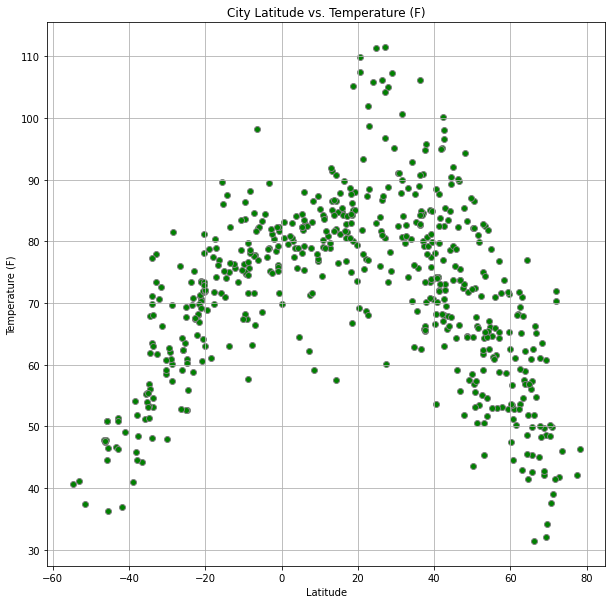

In [24]:
fig = plt.figure(figsize=(10,10))
x = city_df['Lat']
y = city_df['Max Temp']

plt.scatter(x, y, c='green', edgecolor='gray')
plt.title(f'City Latitude vs. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()


fig.savefig('../output_data/Lat_v_Temp.png')
# plt.figure(figsize=(10,10))
# plt.savefig = "../output_data/Lat_v_WindSpeed.png"
#plt.show()
#plt.savefig("../output_data/Lat_v_Temp.png")
#plt.figure(figsize=(10,2))
plt.show()

This plot shows each city's temperature in coorelation to latitude. The highest temperatures appear to be in the 40th parallel north and the lowest temperatures on the outer edges in both directions. 

## Latitude vs. Humidity Plot

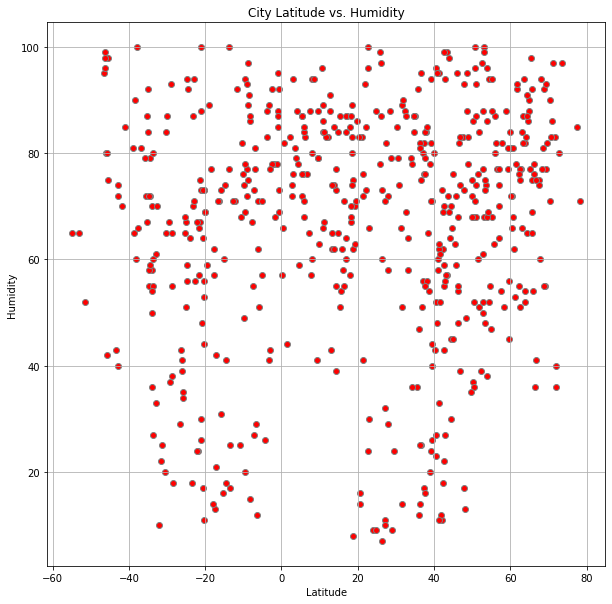

In [11]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Humidity']

plt.scatter(x_values, y_values, c='red', edgecolor='gray')
plt.title(f'City Latitude vs. Humidity')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

fig.savefig("../output_data/Lat_v_Humidity.png")
plt.show()

This plot shows each city's humidity in coorelation to latitude. It appears humidity is pretty wide spread without pattern. There is no clear coorelation. 

## Latitude vs. Cloudiness Plot

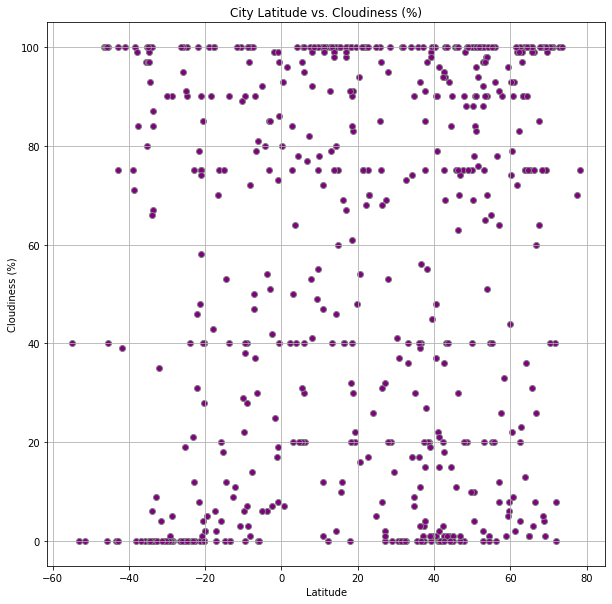

In [12]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.scatter(x_values, y_values, c='purple', edgecolor='gray')
plt.title(f'City Latitude vs. Cloudiness (%)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/Lat_v_Cloudiness.png")
plt.show()

This plot shows each city's cloudiness in coorelation to latitude. It appears cloudiness percentage is pretty wide spread without pattern. There is no clear coorelation. 

## Latitude vs. Wind Speed Plot

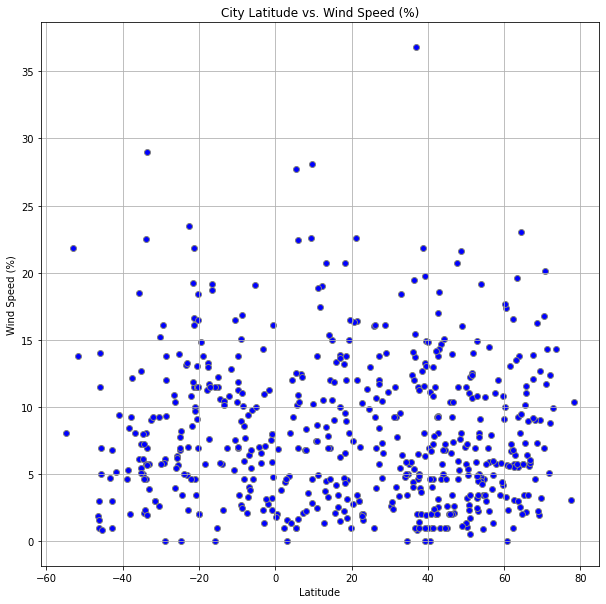

In [13]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Wind Speed']

plt.scatter(x_values, y_values, c='blue', edgecolor='gray')
plt.title(f'City Latitude vs. Wind Speed (%)')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

fig.savefig("../output_data/Lat_v_WindSpeed.png")
plt.show()

This plot shows each city's wind speed percentage in coorelation to latitude. It appears wind speed percentage is pretty wide spread without pattern. There is no clear coorelation. The majority of wind speed percentage is under 20%. It would be interesting to compare wind speed percentage with cloudiness percentage. 

## Linear Regression

In [14]:
def regressplot(x, y):
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,'r-')
    return line_eq

In [15]:
north = city_df.loc[city_df['Lat'] >= 0]
south = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

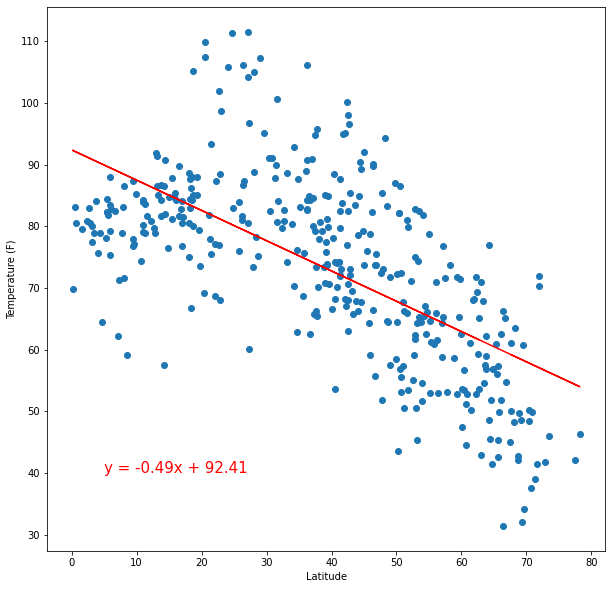

In [16]:
fig=plt.figure(figsize=(10,10))
line_eq = regressplot(x=north['Lat'], y=north['Max Temp'])
plt.annotate(line_eq, (5,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

fig.savefig("../output_data/North_Hem_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

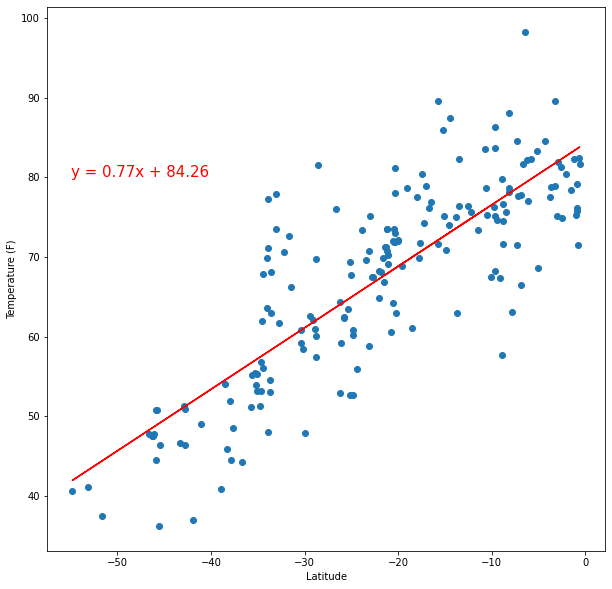

In [17]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Max Temp'])
plt.annotate(linear_regress, (-55,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

fig.savefig("../output_data/South_Hem_Temp.png")
plt.show()

North and South hemisphere temperature are opposite in direction. The highest temperatures still appear to be in the 40th parallel north area as more adequately shown in the Lat vs Max Temp scatter plot. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

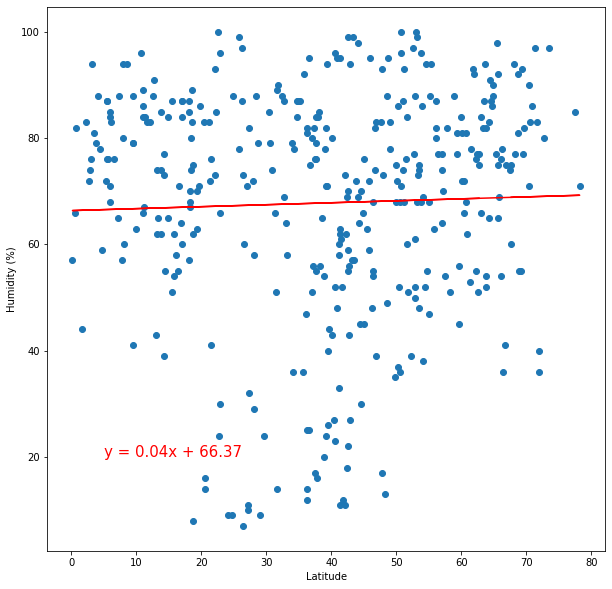

In [18]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Humidity'])
plt.annotate(linear_regress, (5,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

fig.savefig("../output_data/North_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

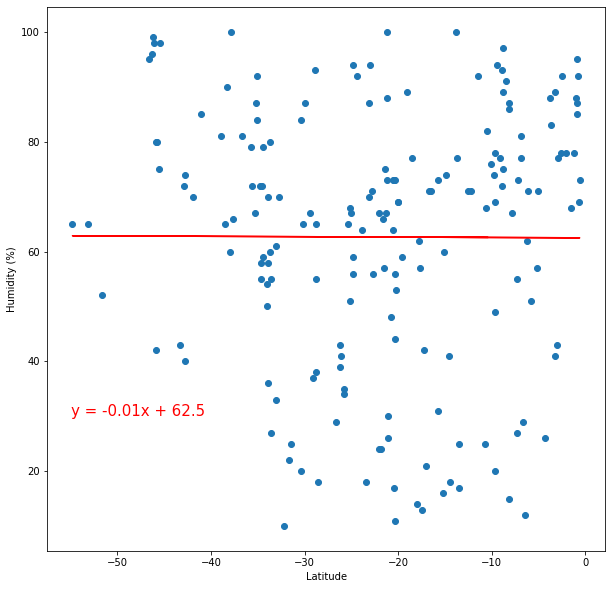

In [19]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Humidity'])
plt.annotate(linear_regress, (-55,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

fig.savefig("../output_data/South_Humidity.png")
plt.show()

These two charts show slightly opposite trend of humidity in relation to the equator. The random city selection also appears to be significantly heavier northen hemisphere based, which may skew the analysis.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

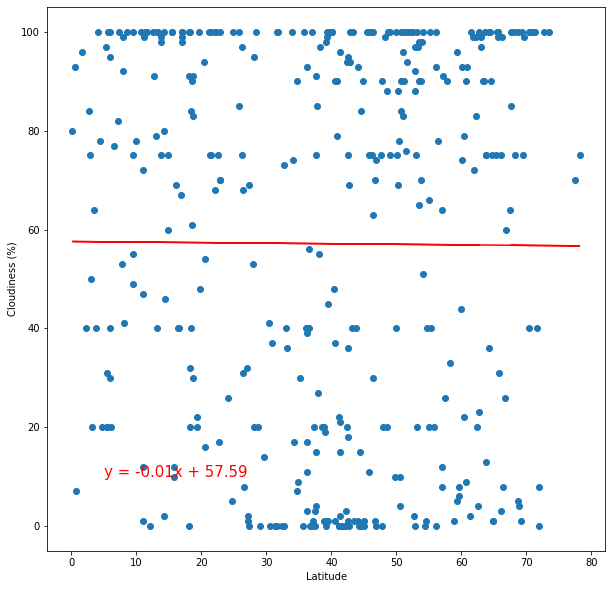

In [20]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Cloudiness'])
plt.annotate(linear_regress, (5,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/North_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

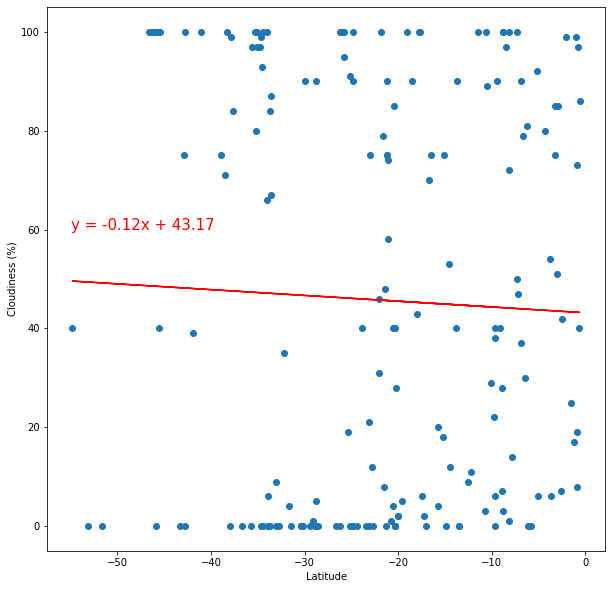

In [21]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Cloudiness'])
plt.annotate(linear_regress, (-55,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/South_Cloud.png")
plt.show()

These two charts show a barely noticeable, slightly opposite trend of cloudiness in relation to the equator. The random city selection also appears to be significantly heavier northen hemisphere based, which may skew the analysis. The northern hemisphere shows multiple cities at 0% and multiple cities at 100% with no pattern to scatter within the middle. The southern hemisphere has more cities at 0% than at any other percentage, but still a few more 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

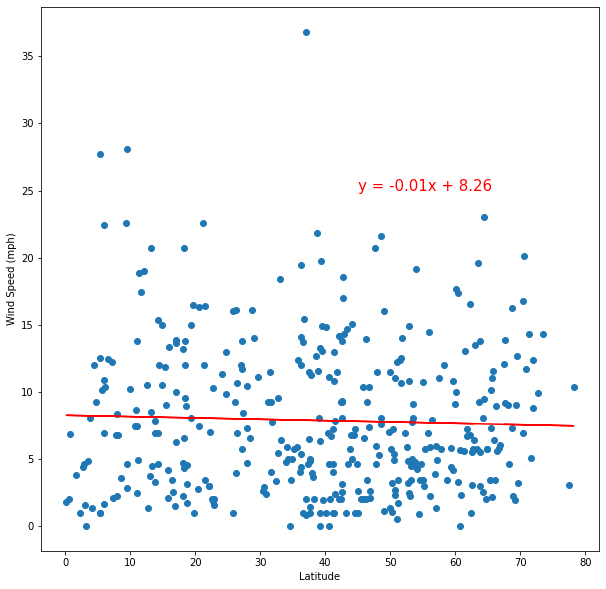

In [22]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Wind Speed'])
plt.annotate(linear_regress, (45,25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

fig.savefig("../output_data/North_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

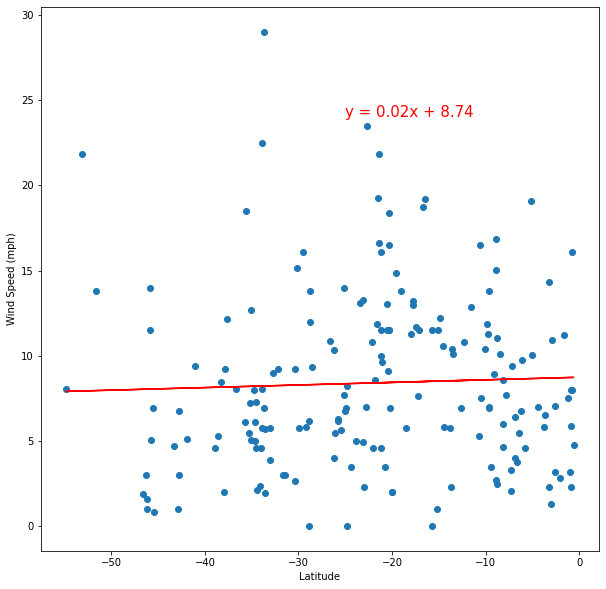

In [23]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Wind Speed'])
plt.annotate(linear_regress, (-25,24), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

fig.savefig("../output_data/South_Wind.png")
plt.show()

These two plots show greater wind in the southern artic region with an overall trend diminishing moving toward the equator. The northern hemisphere shows hardly any change in wind speed, but on average wind is greater in the north.  